<a href="https://colab.research.google.com/github/zaineli/3D-Animated-Website/blob/main/ML_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!git clone https://github.com/zaineli/Patient-Dropout-Prediction

Cloning into 'Patient-Dropout-Prediction'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 3.73 MiB | 8.89 MiB/s, done.
Resolving deltas: 100% (2/2), done.


# **1. Data Exploration and Preprocessing**

In [ ]:
%cd Patient-Dropout-Prediction
import pandas as pd

data = pd.read_csv('data_patient_dropout.csv')

[Errno 2] No such file or directory: 'Patient-Dropout-Prediction'
/content/Patient-Dropout-Prediction/Patient-Dropout-Prediction


## **a. Understanding the Dataset**

In [ ]:
data.head()

,Patient ID,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1


In [ ]:
data.describe()

,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
count,4284.000000,4275.000000,4284.000000,4275.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,13.878151,3.488421,0.867180,1.444211,0.187208,0.980159,2.295985,0.169234,2.348506,0.563259,0.856209
std,15.934084,6.789401,3.070022,2.082496,0.517691,1.140525,6.052666,0.400299,2.868862,0.703856,0.350918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,10.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,17.000000,5.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
max,436.000000,225.000000,50.000000,34.000000,11.000000,14.000000,256.000000,3.000000,35.000000,2.000000,1.000000




1.    For most columns, we have data for 4284 observations, except for "Number of Treatment Goals Set" and "Number of Progress Reviews Attended," where some values are missing (4275 observations).

2.   Patients tend to attend a moderate number of treatment sessions (around 14),
but some activities like confirming treatment plans (0.19) and logging in to the health portal (0.17) have much lower averages, indicating that these actions are less frequent.

3. Patients vary widely in the number of treatment sessions, goals set, and the number of treatment options explored. Features like logging into the portal have less variation, indicating more uniform behavior.

4. High Variability: Many features, like the number of treatment sessions and goals set, have high variability. This indicates that while some patients are highly engaged, others have very little interaction with their treatment plans.

5. Zero Values: Several columns (e.g., "Number of Treatment Goals Revised" and "Number of Times Logged into Health Portal") have a median and 25th percentile of 0, meaning many patients did not engage with these aspects at all.

6. Outliers: Some features have extreme maximum values (e.g., 436 treatment sessions or 256 treatment options explored), indicating the presence of outliers. These outliers may need special attention, such as capping or removal, to ensure they don't distort the analysis.





In [ ]:
data.dtypes

,0
Patient ID,object
Initial Consultation Attended,object
Number of Treatment Sessions Attended,int64
Number of Treatment Goals Set,float64
Number of Treatment Goals Revised,int64
Number of Progress Reviews Attended,float64
Number of Times Treatment Plan Confirmed,int64
Number of Times Treatment Phase Initiated,int64
Number of Treatment Options Explored,int64
Number of Times Logged Into Health Portal,int64


## **b. Handling Missing Values**

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Initial Consultation Attended,0
Number of Treatment Sessions Attended,0
Number of Treatment Goals Set,9
Number of Treatment Goals Revised,0
Number of Progress Reviews Attended,9
Number of Times Treatment Plan Confirmed,0
Number of Times Treatment Phase Initiated,0
Number of Treatment Options Explored,0
Number of Times Logged Into Health Portal,0


This shows us that there are 2 features that have 9 null values each.

In [ ]:
data.fillna({'Number of Treatment Goals Set': data['Number of Treatment Goals Set'].mean()}, inplace=True)

In [ ]:
data.fillna({'Number of Progress Reviews Attended': data['Number of Progress Reviews Attended'].median()}, inplace=True)



*   The reason why I filled null values of ('Number of Treatment Goals Set') with mean is because I felt there is some symmetry in feature indicating very less outlier.
*   The reson why I filled null values of (''Number of Progress Reviews Attended') is because I saw that there are alot of outliers in feature.



## **c. Handling Outliers**

In [ ]:
import numpy as np

outliers = np.array([])
for i in data.select_dtypes(include=np.number).columns:
  z = (data[i]-data[i].mean())/data[i].std()
  outlier = np.where(z > 3)
  outliers = np.append(outliers, outlier)
  print(f'{i} has {len(outlier[0])} outliers')

Number of Treatment Sessions Attended has 53 outliers
Number of Treatment Goals Set has 33 outliers
Number of Treatment Goals Revised has 76 outliers
Number of Progress Reviews Attended has 81 outliers
Number of Times Treatment Plan Confirmed has 63 outliers
Number of Times Treatment Phase Initiated has 64 outliers
Number of Treatment Options Explored has 38 outliers
Number of Times Logged Into Health Portal has 40 outliers
Number of Educational Resources Viewed has 96 outliers
Patient Segment Type has 0 outliers
Treatment Dropped has 0 outliers


In [ ]:
features = [
    'Number of Treatment Sessions Attended',
    'Number of Treatment Goals Set',
    'Number of Treatment Goals Revised',
    'Number of Progress Reviews Attended',
    'Number of Times Treatment Plan Confirmed',
    'Number of Times Treatment Phase Initiated',
    'Number of Treatment Options Explored',
    'Number of Times Logged Into Health Portal',
    'Number of Educational Resources Viewed'
]

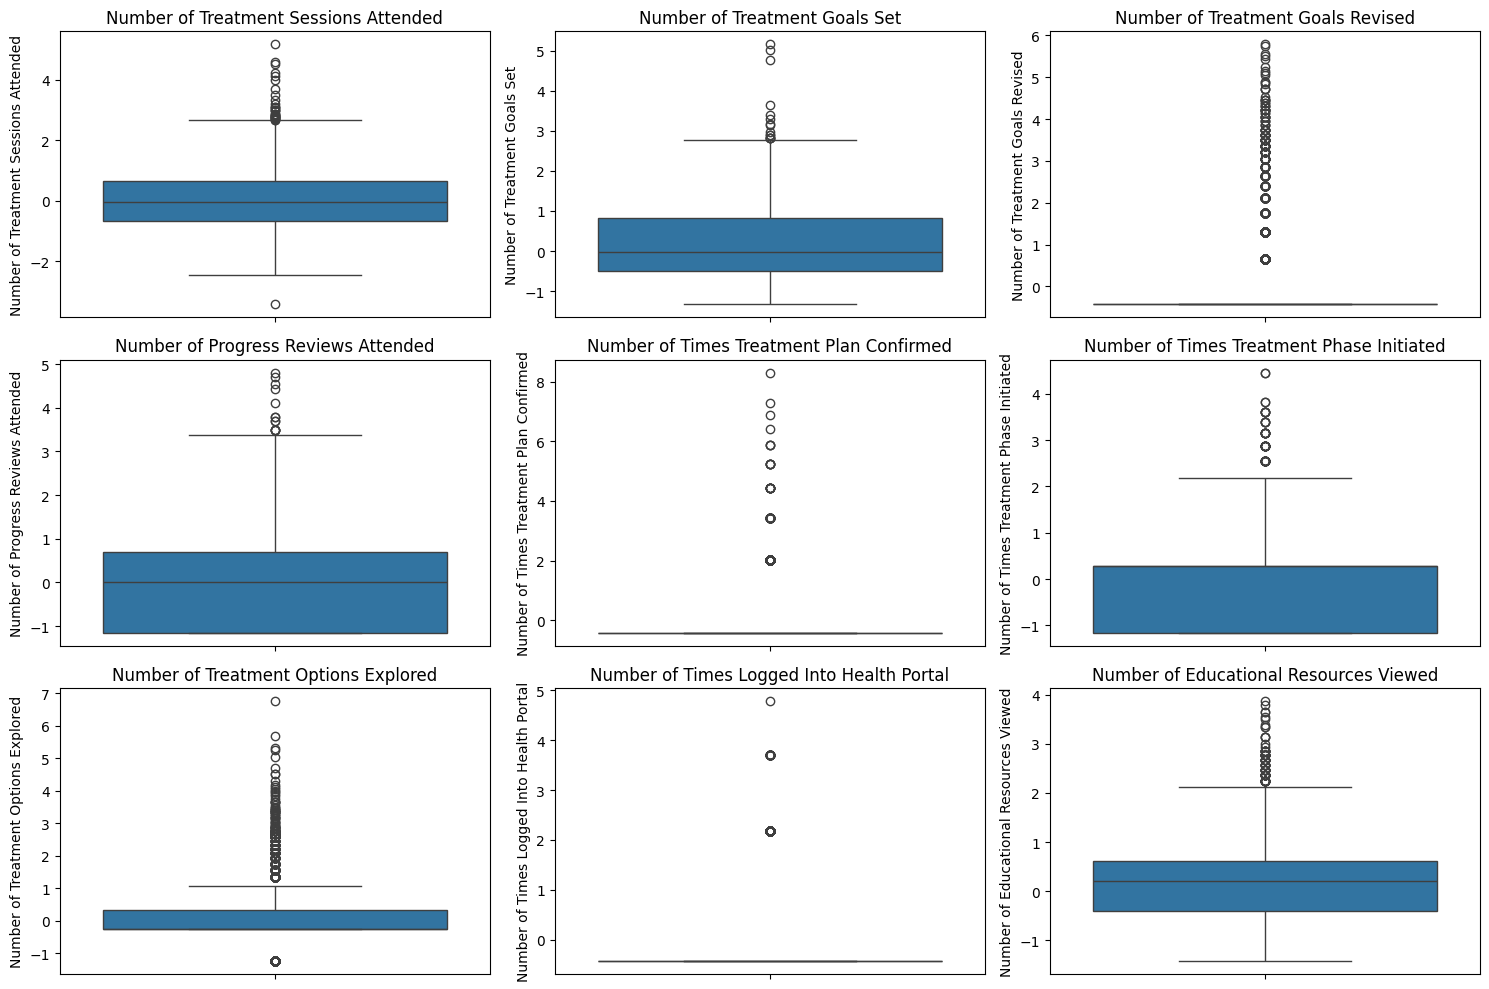

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


There are some High Outlier Counts in Educational Resources Viewed (96) and Progress Reviews Attended (81) and moderate outlier counts in Number of Treatment Sessions Attended (53), Number of Times Treatment Plan Confirmed (63), and Number of Treatment Phase Initiated (64).

In [ ]:
data.shape

(4284, 13)

Checking how many feature columns contain how many zero values beacuse if they include any zero value, we cannot apply log transformation and we have to then apply log1p transformation.

In [ ]:
for i in features:
  contain_zero = sum(data[i]==0)
  if contain_zero:
    print(f'{i, contain_zero} has zero values')



('Number of Treatment Sessions Attended', 1) has zero values
('Number of Treatment Goals Set', 927) has zero values
('Number of Treatment Goals Revised', 3429) has zero values
('Number of Progress Reviews Attended', 1379) has zero values
('Number of Times Treatment Plan Confirmed', 3597) has zero values
('Number of Times Treatment Phase Initiated', 1524) has zero values
('Number of Treatment Options Explored', 1007) has zero values
('Number of Times Logged Into Health Portal', 3600) has zero values
('Number of Educational Resources Viewed', 911) has zero values


Using log1p is an effective way to handle zeros. This transformation is particularly beneficial for skewed data, as it helps normalize the distribution while safely managing zero values.

In [ ]:
for column in features:
    data[column] = np.log1p(data[column])

## **d. Encoding Categorical Variables**

Initial Consultation Attended can use binary encoding (0 for "No" and 1 for "Yes") or one-hot encoding.

In [ ]:
data['Initial Consultation Attended'] = data['Initial Consultation Attended'].map({'Yes': 1, 'No': 0})
data['Initial Consultation Attended']

,Initial Consultation Attended
0,1
1,0
2,0
3,0
4,1
...,...
4279,1
4280,0
4281,0
4282,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

data = pd.get_dummies(data, columns=['Patient Segment Type'], drop_first=True)

## **e. Feature scaling**

Since many features have different ranges and distributions,Standardization (Z-score normalization) is recommended for features that can be normally distributed (after transformation).

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
